### 1. Edge Detection

(a) Implement convolution process of smoothing Image 1 with a 5 x 5 Gaussian Filter with $\sigma$ = 1 and 2 , plot the corresponding output images.

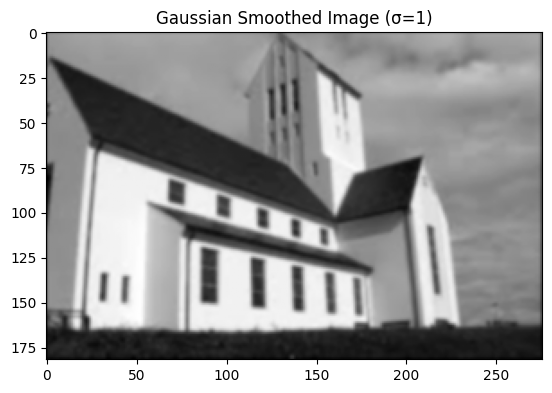

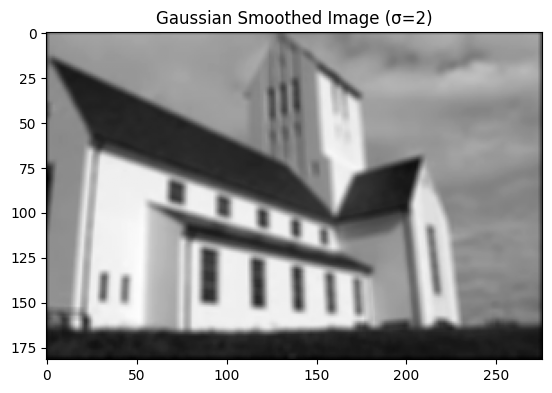

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load Image 1 in grayscale
image = cv2.imread('image1.png', cv2.IMREAD_GRAYSCALE)

# Function to generate a Gaussian kernel
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: 
        (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)), 
        (size, size))
    return kernel / np.sum(kernel)  # Normalize

# Convolution function
def custom_convolve(image, kernel):
    return convolve(image, kernel, mode='constant', cval=0.0)

# Apply Gaussian filtering with sigma = 1 and 2
for sigma in [1, 2]:
    kernel = gaussian_kernel(5, sigma)
    smoothed = custom_convolve(image, kernel)
    
    plt.figure()
    plt.title(f'Gaussian Smoothed Image (σ={sigma})')
    plt.imshow(smoothed, cmap='gray')
    plt.show()

(b) Implement convolution process of convolving a 3 x 3 Sobel filters ($S_x$ and $S_y$) with the output images you obtained in step a. Plot the outputs of each step and the final edge map which combines edges in $x$ and $y$ directions

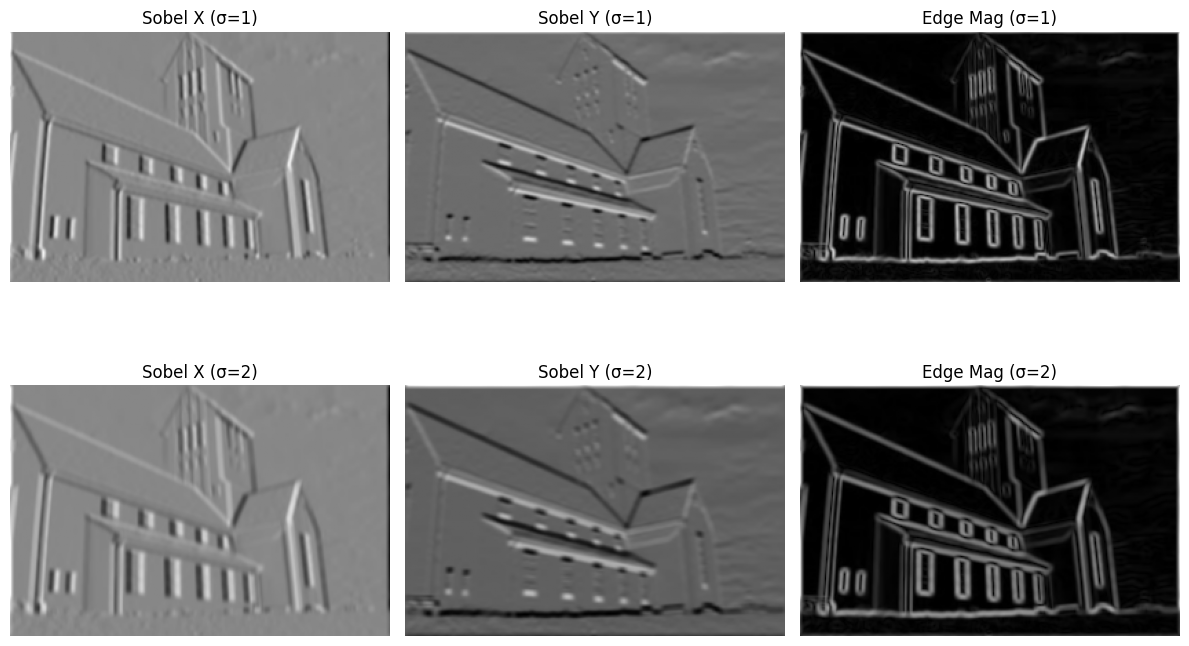

In [ ]:
# Sobel filters
Sx = np.array([[-1, 0, 1], 
               [-2, 0, 2], 
               [-1, 0, 1]])

Sy = np.array([[-1, -2, -1], 
               [0, 0, 0], 
               [1, 2, 1]])

# Compute gradients
Gx = custom_convolve(smoothed, Sx)
Gy = custom_convolve(smoothed, Sy)

# Compute gradient magnitude
edge_map = np.sqrt(Gx**2 + Gy**2)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Gradient X')
plt.imshow(Gx, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Gradient Y')
plt.imshow(Gy, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Final Edge Map')
plt.imshow(edge_map, cmap='gray')

plt.show()

(c) Implement convolution process of convolving Image 1 with $\frac{\partial G}{\partial x}$ and $\frac{\partial G}{\partial y}$ filters (5 × 5 filters and for $\sigma = 1$ and $2$) and plot the outputs of each step and the final edge map which combines edges in $x$ and $y$ directions.

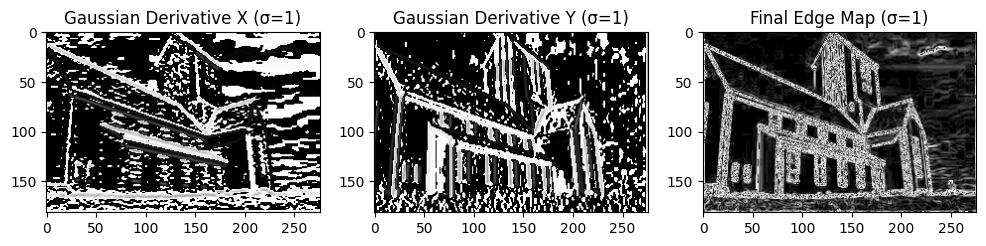

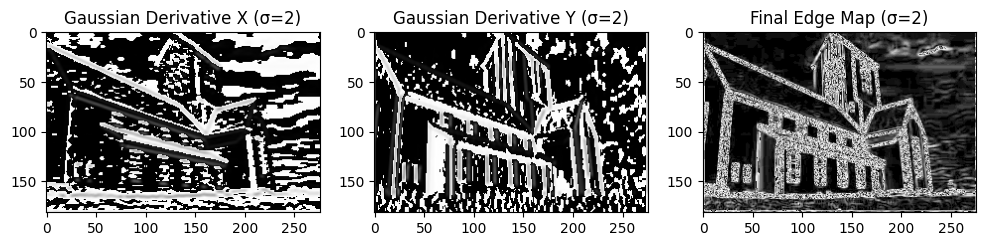

In [20]:
# Derivative of Gaussian function
def gaussian_derivative_kernel(size, sigma, axis='x'):
    center = (size - 1) / 2
    kernel = np.fromfunction(lambda x, y: 
        -((x-center) if axis == 'x' else (y-center)) / (sigma**2) * 
        np.exp(-((x-center)**2 + (y-center)**2) / (2*sigma**2)), 
        (size, size))

    return kernel / np.sum(np.abs(kernel))  # Normalize

# Compute derivatives with sigma = 1 and 2
for sigma in [1, 2]:
    Gx = gaussian_derivative_kernel(5, sigma, 'x')
    Gy = gaussian_derivative_kernel(5, sigma, 'y')

    edge_x = custom_convolve(image, Gx)
    edge_y = custom_convolve(image, Gy)
    edge_final = np.sqrt(edge_x**2 + edge_y**2)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title(f'Gaussian Derivative X (σ={sigma})')
    plt.imshow(edge_x, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title(f'Gaussian Derivative Y (σ={sigma})')
    plt.imshow(edge_y, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title(f'Final Edge Map (σ={sigma})')
    plt.imshow(edge_final, cmap='gray')

    plt.show()

##### Observations of Final Output of b and c:
Edge Detection Sharpness: In part b, the edges appear sharper and more defined, particularly along architectural boundaries. In part c, the edges appear smoother and slightly more spread out, especially when $\sigma = 2$

Noise Sensitivity: The Sobel filter in part is more sensitive to high-frequency noise and small intensity changes, leading to noisier edges. The Gaussian derivative filter in part c reduces noise better, especially with a larger $\sigma$ due to the smoothing effect before differentiation.

Edge Continuity: Sobel filtering in b results in some broken edges where intensity changes are weaker. Gaussian derivative filtering in c produces more continuous and natural edges, as the Gaussian smoothing helps to integrate weaker edges into the response.

Effect of $\sigma$: Increasing $\sigma$ in part c makes edges smoother and broader, reducing noise but slightly blurring fine details. In contrast, Sobel filtering in part b does not involve smoothing, which keeps all fine details but retains noise.

Conclusion: 
The Gaussian derivative method part c provides better edge continuity and is less sensitive to noise, especially with $\sigma = 2$.\
The Sobel method part b enhances fine details like the windows and roofing but is more sensitive to noise.\
If noise reduction is important, Gaussian derivative filtering is better. If preserving fine details is important, Sobel filtering is better.

#### 2. Corner Detection
Implement Harris Corner Detection algorithm step by step as explained in the class. Apply your script to detect corners in image 1. Plot the corner response map, and the non-maximum suppression output.

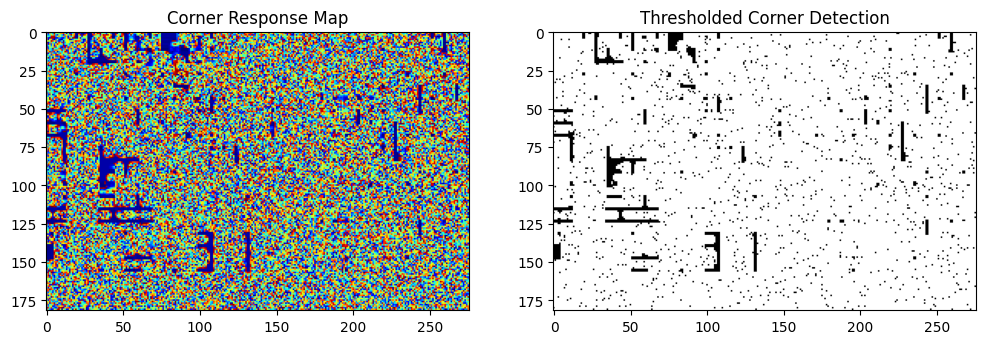

In [21]:
# Harris Corner Detection
def harris_corner_detection(image, k=0.04, threshold=0.01):
    # Compute gradients
    Ix = custom_convolve(image, Sx)
    Iy = custom_convolve(image, Sy)

    # Compute products of derivatives
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix * Iy

    # Apply Gaussian smoothing
    Sxx = custom_convolve(Ixx, gaussian_kernel(5, 1))
    Syy = custom_convolve(Iyy, gaussian_kernel(5, 1))
    Sxy = custom_convolve(Ixy, gaussian_kernel(5, 1))

    # Compute Harris response
    detM = (Sxx * Syy) - (Sxy**2)
    traceM = Sxx + Syy
    R = detM - k * (traceM**2)

    # Thresholding
    corner_map = np.zeros_like(R)
    corner_map[R > threshold * R.max()] = 255

    return R, corner_map

# Compute Harris Corner Detection
response, corners = harris_corner_detection(image)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Corner Response Map")
plt.imshow(response, cmap='jet')

plt.subplot(1, 2, 2)
plt.title("Thresholded Corner Detection")
plt.imshow(corners, cmap='gray')

plt.show()